### La prediction des réclamations ou des accidents est omnipresente chez les compagnies d'assurance, les banques, et presque part tout
### Un bon exemple: l'Amérique, là où la prediction des futur accidents signifie le Bénéfice net pour des compagnie comme "Allstate" et "Nationwide"

### Dans ce context, le CGA affirme: "le potentiel de développement des assurances en Tunisie reste faiblement exploité" 

### Et l'un des recommandations : "Le CGA doit revoir le système de tarification actuel et, rétablir des tarifs basés sur des données techniques et interdire la vente forcée des garanties annexes."

### L'objectif de cette étude est de prédire la probabilite de l'implication d'un futur accident
### On a essayer de combiner 4 facteurs : 
#### * information de l'assureur
#### * information de la vehicule
#### * information de la police
#### * la sinistralite du passé 

# Ces 4 facteurs révèlent le parttern des profile sinistré dans la vie reelle et l'assurance peut en tenir compte pour mieux personnaliser la cotisation, et sur tout ça peut reduire la frequence de sinistralite horrible en Tunisie

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier





from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
police = pd.read_csv("data/Police.csv",delimiter = ";")
sinistre = pd.read_csv("data/Sinistre.csv",delimiter = ";")
classBonusMalus = pd.read_csv("data/classBonusMalus.csv",delimiter = ";")
epave = pd.read_csv("data/epave.csv",delimiter = ";")
marque = pd.read_excel("data/marque.xlsx",delimiter = ";")

vehicule = pd.read_csv("data/nouveau/vehicule.csv",delimiter = ";")
assure = pd.read_csv("data/nouveau/assure.csv",delimiter = ";")
usageN = pd.read_csv("data/nouveau/uasgeCga.csv",delimiter = ";")


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [46]:
classBonusMalus.columns

Index(['id', 'police_id', 'vehicule_id', 'assure_id', 'souscripteur_id',
       'classeBonusMalus', 'classeBonusMalusCompagnie', 'classeBonusMalusCGA',
       'coefBonusMalus', 'coefBonusMalusCompagnie', 'coefBonusMalusCGA',
       'DATE_AFFECTATION', 'CONTRAT_EN_COURS', 'Etat_Donne', 'bonus',
       'ETAT_VEHICULE', 'DATE_RETRAIT', 'date_Calcule', 'date_Occurence',
       'date_changement_etat', 'dernierClassBonusMallus', 'consulter',
       'codeUsage', 'codeGouvernorat', 'dateChangementVehicule', 'statut'],
      dtype='object')

In [3]:
vehicule_marque=pd.merge(vehicule, marque, left_on='codeMarque', right_on='CD_MARQ')
police_BM=pd.merge(police, classBonusMalus, left_on='id', right_on='police_id')
BMfinal=pd.merge(vehicule_marque,police_BM, left_on='id', right_on='vehicule_id')
BMfinali=pd.merge(usageN,BMfinal, left_on='code Usage', right_on='codeUsage')
BMfinall=pd.merge(BMfinali,assure, left_on='assure_id', right_on='id')


In [4]:
data=BMfinall.copy()
sinistreTest=sinistre.copy()
data.shape

(35462, 75)

# Column Target
### 1 pour un profile sinistré et 0 pour un profile non sinistré 

In [5]:
data['target'] = 0

In [6]:
data.drop_duplicates('police_id',inplace=True)
sinistreTest.drop_duplicates('cga_police_id',inplace=True)
data.set_index('police_id', inplace=True)
sinistre.set_index('cga_police_id', inplace=True)

In [7]:
#profiling.set_index('police_id', inplace=True)
sinistreTest.set_index('cga_police_id', inplace=True)

In [8]:
data.drop(columns=['id_x','id_y'],inplace=True) # ID Y ID BONUS MALUS 

In [9]:
#data = data[['vehicule_id','puissanceFiscal','energie','typePolice','naturePolice','classeBonusMalus','lib Usage','DESIGL','target']]

In [10]:
for car in sinistreTest.iterrows():
    idd = car[0]
    data.at[idd,'target'] =  1


In [11]:
#profiling.reset_index( inplace=True)
sinistre.reset_index( inplace=True)

In [12]:
data.drop_duplicates('vehicule_id',inplace=True)

In [13]:
columns =  ['verouillageModifPolice','CD_MARQ_CH','Etat_Donne','code Usage','ENABLED','numChassis','dateDerniereVisite','DATE_RETRAIT_x','dateMiseEpave','dateAjout','CODE_STR','numImmatriculation','dateInsertion','consulter','codeGouvernorat','DDEB','DESIGA','date_Calcule','dateChangementVehicule','DATE_OBTENTION','codeTypePieceIdentite','id','statut','date_Occurence','consulter','date_changement_etat','DATE_RESILIATION','Date_Suspenssion','dateRemiseEnVigueure','DATE_AFFECTATION','DATE_RETRAIT_y','dateExpirationPolice','RESILIATION_ECHEANCE','dateEcheancePolice','dateEffetPolice','numPolice','code_Courtier_CGA','OBSERV','DFIN','dateChangementVehicule','dateMiseAjourVehicule','dateMiseCirculation','statut','codeTypePieceIdentite','DATE_OBTENTION']

In [14]:
data.drop(columns=columns, axis=1, inplace = True)

In [15]:
data.isna().sum();

In [16]:
recap = data.copy()

# COUNT sinistre
### Calcule de nombre de sinistres par chaque profile

In [17]:
nb_sinistre =(sinistre['cga_vehicule_id'].value_counts()) 
nb_sinistre

558074     12
574584      7
12225       6
247658      6
998101      5
           ..
92024       1
608124      1
1070974     1
307073      1
1181697     1
Name: cga_vehicule_id, Length: 26844, dtype: int64

In [18]:
countSinistre = nb_sinistre.to_frame()
countSinistre=countSinistre.reset_index()
countSinistre.columns=['id_vehicule','count']

In [19]:
data['sinistreCount'] = 0

In [20]:
countSinistre.set_index('id_vehicule', inplace = True)

In [21]:
data.set_index('vehicule_id', inplace=True)

In [22]:
for car in countSinistre.iterrows():
    idd = int(car[0])
    data.at[idd,'sinistreCount'] =  countSinistre.at[idd,'count']

# Column SumResponsabilite
### Pour les profile sinistré, on calcule la somme de responsabilite de chaque sinistre

In [23]:
data['SumResponsabilite'] = 0

In [24]:
df = sinistre[['cga_vehicule_id','pourcentadeDeResponsabilite']]
df = df.groupby('cga_vehicule_id').sum()

In [25]:
for car in df.iterrows():
    idd = int(car[0])
    data.loc[idd,'SumResponsabilite'] =  df.at[idd,'pourcentadeDeResponsabilite']

# Column NY_with_licence
### le nombre des annees avec permis de conduite

In [26]:
data.dropna(axis=0 , inplace=True)

In [27]:
from datetime import datetime

In [28]:
data['NY_with_licence'] = 0

In [29]:
classBonusMalus_assure = pd.merge(classBonusMalus,assure,left_on='assure_id', right_on='id')

In [30]:
classBonusMalus_assure.drop_duplicates('vehicule_id',inplace=True)
classBonusMalus_assure.set_index('vehicule_id',inplace=True)

In [31]:
for car in data.iterrows():
    idd = int(car[0])
    #print(((datetime.today() - pd.to_datetime(classBonusMalus_assure.DATE_OBTENTION[idd]))).days/364)
    data.at[idd,'NY_with_licence'] =  ((datetime.today() - pd.to_datetime(classBonusMalus_assure.DATE_OBTENTION[idd]))).days/364

In [32]:
data['NY_with_licence'] = data['NY_with_licence'].abs()

In [33]:
data.drop(['assure_id','souscripteur_id'],axis=1,inplace=True)

# Features cleaning and reformating

In [34]:
data = data[data['energie']!=0]
data = data[data['puissanceFiscal']!=0]
data = data[data['puissanceFiscal']!=1]
data["energie"] =  data["energie"].str.lower()

### Si on compte le nombre de vehicule par rapport le groupe de modele (128 model), on remarque que plus de 3 quart des marque ne comporte qu'une seule vehicule
### On va les regrouper dans une seule categorie << OTHER >> 
### Le meme processus est applique sur la colone << lib Usage >>

In [35]:
liste2 = [
'Engin de Chantiers',                                                             
'Agricole Tracteur et Moissonneuse Batteuse',                                      
'Agricole 2 véhicule dont le PTC > 3500 kg',                                       
'Transport public de voyageurs',                                                   
'Transport privé de personnes (personnel / enfants /membre d’association)',         
'autres usages (Ambulance / Corbillard / RC Garagiste / RC Trajet etc)',            
'Agences de Voyage et Hôtels'                                                     
]

In [36]:
liste1 = ['O.M','SSANGYONG',            
'SUZUKI',               
'MAHINDRA',              
'CHERY',                 
'IVECO-FIAT ',           
'SCANIA',                
'TATA',                  
'VOLVO',                 
'DAIMLER-CHRYSLER',      
'LAND ROVER',            
'UNIC',                  
'SKODA',                 
'DAIMLER BENZ',          
'BERLIET',               
'MINI',                  
'ALFA-ROMEO',            
'BAIC YINXIANG',         
'PORSCHE',               
'GREATWALL',             
'JEEP',                  
'RENAULT TRUCKS',        
'LANCIA',                
'KING LONG',             
'HONDA',                 
'SICAME',                
'TUNICOM',               
'MASSEY-FERGUSSON',      
'ROVER',
'HELI'           ,  
'DETANK'          ,   
'EBRO', 
'DODGE',            
'DAF',                
'LEXUS',              
'CHRYSLER',           
'ASTRA',              
'WALLYSCAR',          
'SSANGYOUNG',         
'SMART',              
'ZHEJIANG',           
'CASE',               
'PIAGGIO',            
'ESCORTS LIMITED',    
'MERLO',              
'MATRA',              
'MATEUR DEUTZ',       
'MAGIRUS-DEUTZ',      
'FERMEC',             
'BEIJING',            
'AVIA',               
'AUTOBIANCHI',        
'ZORZI',              
'GLOBAL POWER',       
'GM',                 
'YTO',                
'TUMOSAN',            
'TRAILOR',            
'TEREX',              
'SOVAB',              
'SIMMA',              
'SIMCA',              
'SHANGLI',            
'SCCM',               
'SANG-YOUNG',         
'SANE',               
'SAMSUNG',            
'SAME',               
'SAAB',              
'PROTON',             
'NT',                 
'MMC',                
'KOMATSU',            
'KIOTI',              
'JAC',                
'IVECO-MAGIRUS',      
'I.M.T.',             
'GMC',                
'LIUGONG', 
'IVECO-FIAT',            
'MORRIS',                
'MAN',                   
'MINIONE',               
'HIDROMEK',              
'SAVIEM',                 
'HONDA MOTORS',           
'JAGUAR',                 
'NEW HOLLAND',            
'JCB',                    
'JEDAA',                  
'LANDINI',                
'I.M.M',                  
'KUBOTA',                 
'DAEWOO',                 
'COMET',                  
'DONGFENG',               
'M.G.',                   
'DAIHATSU',               
'MMC-SITTIPOL',           
'JAGUAR-LANDROVER',       
'DIECI',                  
'FOTON',                  
'MMCSITTIPOL',            
'STEYR',                  
'TAFE',                   
'JOHN DEERE'             
]                 

In [37]:
data.replace(liste2,'other',inplace=True)
data.replace(liste1,'other',inplace=True)

In [38]:
recap2 = data.copy()

In [40]:
recap2.to_csv('recap.csv')

In [132]:
pie = recap2['lib Usage'].value_counts().head(4)

In [164]:
zipCodes = pd.read_csv("data/zipcodes.csv", error_bad_lines=False,delimiter = ";")
zipCodes.columns = ['Gouvernorat','Delegation','Localite','codePostale']


b'Skipping line 4788: expected 4 fields, saw 5\n'


In [165]:
zipCodes.set_index('codePostale',inplace=True)
postal_dict = zipCodes.to_dict()


In [198]:
recap2['codePostal'] = recap2['codePostal'].astype(int)
recap2['location'] = recap2['codePostal'].map(postal_dict['Delegation'])


In [199]:
recap2

,lib Usage,codeMarque,puissanceFiscal,typeImmatriculation,energie,etatVehicule,CD_MARQ,CD_CONST,DESIGL,codeCompagnie,...,bonus,ETAT_VEHICULE,dernierClassBonusMallus,codeUsage,codePostal,target,sinistreCount,SumResponsabilite,NY_with_licence,location
vehicule_id,,,,,,,,,,,,,,,,,,,,,
79650.0,Privé et professionnel,206.0,6.0,TU,essence,V,206.0,206.0,SEAT,8.0,...,0.0,V,1.0,1.0,2052,0.0,0.0,0,29,Ezzouhour (Tunis)
92410.0,Privé et professionnel,206.0,6.0,TU,essence,V,206.0,206.0,SEAT,4.0,...,0.0,V,1.0,1.0,2045,1.0,2.0,0,6,La Marsa
93832.0,Privé et professionnel,206.0,5.0,TU,essence,V,206.0,206.0,SEAT,4.0,...,1.0,V,1.0,1.0,2092,1.0,1.0,0,18,El Menzah
6552.0,Privé et professionnel,206.0,6.0,TU,essence,V,206.0,206.0,SEAT,2.0,...,1.0,V,1.0,1.0,8050,1.0,1.0,0,40,Hammamet
8327.0,Privé et professionnel,206.0,6.0,TU,essence,V,206.0,206.0,SEAT,2.0,...,0.0,V,1.0,1.0,3011,1.0,1.0,0,19,Sakiet Eddaier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019113.0,other,1011.0,10.0,ES,gasoil,V,1011.0,1011.0,other,6.0,...,1.0,V,1.0,16.0,1005,1.0,1.0,100,34,El Omrane
1064775.0,other,2845.0,10.0,ES,gasoil,V,2845.0,2845.0,other,7.0,...,0.0,V,1.0,16.0,2096,0.0,0.0,0,31,Nouvelle Medina
1063314.0,other,2845.0,10.0,ES,gasoil,V,2845.0,2845.0,other,6.0,...,0.0,V,1.0,16.0,2000,1.0,1.0,100,22,Le Bardo


# Feature selection

### with SVR

In [119]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR


In [220]:
le = preprocessing.LabelEncoder()

X = data.drop(columns=['target'],axis = 1)
y = data['target']



# Categorical boolean mask
categorical_feature_mask = X.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = X.columns[categorical_feature_mask].tolist()
#apply le on categorical feature columns
#X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))

In [135]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, 5, step=1)
selector = selector.fit(X, y)

In [248]:
df = pd.DataFrame()
df['rep'] = recap2['target']
recap2.drop('target',axis=1,inplace=True)

recap2['target'] = df['rep'] 


### with ExtraTreesClassifier

[0.03666538 0.04874244 0.03678858 0.03655392 0.31709896 0.13124143
 0.06629156 0.01907484 0.02444471 0.01985429 0.01983433 0.02632492
 0.02128828 0.01126319 0.01723409 0.00163233 0.02063685 0.07256488
 0.07246501]


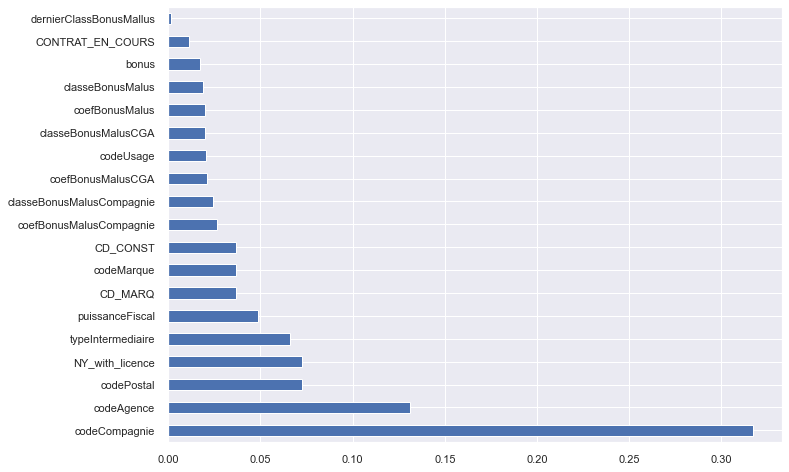

In [245]:
#X = data.iloc[:,0:20]  #independent columns
#y = data.iloc[:,-1]    #target column i.e price range

X = recap2.drop(columns=['target','sinistreCount','SumResponsabilite'],axis = 1)
y = recap2['target']

columns_to_scale  = list(X.select_dtypes(exclude="object").columns) 
# filter categorical columns using mask and turn it into a list
X = X[columns_to_scale]

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


# Chi2

In [276]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

(34519, 32)

In [277]:
def load_dataset(data):
    X = data.iloc[:,0:31]
    y = data.iloc[:,-1] 
    categ = list(encode.select_dtypes(include = "object"))
    X = X[categ]
    X= X.values
    y= y.values
    X = X.astype(str)
    return X, y

def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs



Feature 0: 1.757216
Feature 1: 0.006064
Feature 2: 130.139579
Feature 3: 39.625008
Feature 4: 14.337841


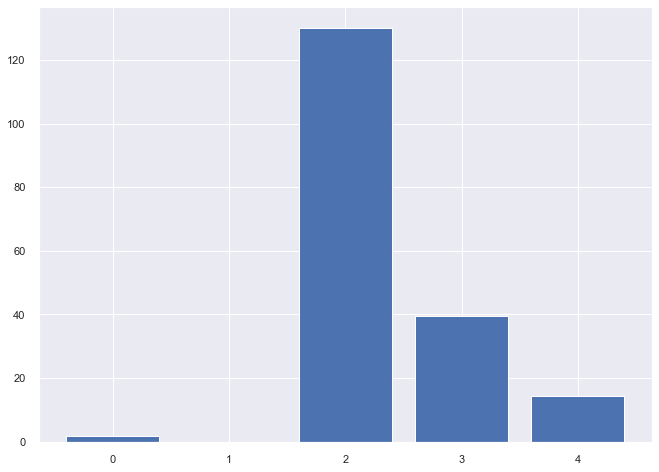

In [279]:
X, y = load_dataset(recap2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

# Get correlations of each features in dataset


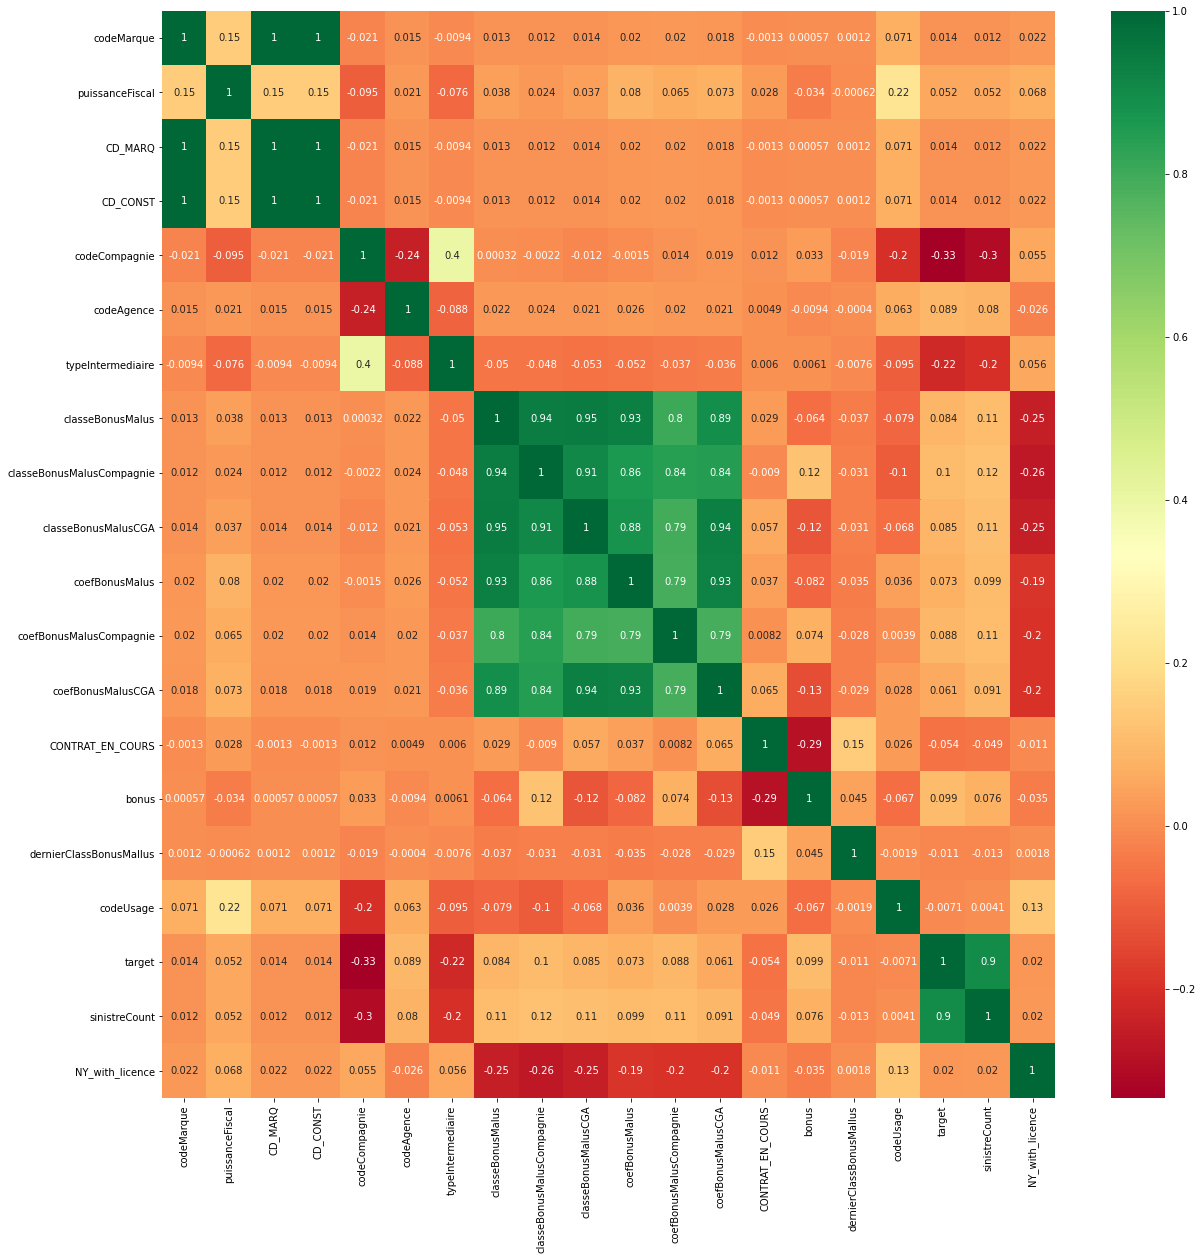

In [42]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


## Apres les tests , on choisi les features 

In [47]:
forUser = data.copy()

In [77]:
data = forUser[['puissanceFiscal','energie','typePolice','naturePolice','bonus','NY_with_licence','typeIntermediaire','classeBonusMalusCompagnie','coefBonusMalusCompagnie','SumResponsabilite','lib Usage','DESIGL','codePostal','target']]

In [49]:
for_model = data.copy()

In [1]:
hi = ['puissanceFiscal','energie','typePolice','naturePolice','bonus','NY_with_licence','typeIntermediaire','classeBonusMalusCompagnie','coefBonusMalusCompagnie','SumResponsabilite','lib Usage','DESIGL','codePostal','target']

In [2]:
len(hi)

14

### OneHotEncoder

In [82]:
encode = data.drop(['target','SumResponsabilite'],axis=1)
columns_to_encode = list(encode.select_dtypes(include = "object"))
columns_to_scale  = list(encode.select_dtypes(exclude="object").columns) 
# Instantiate encoder/scaler
scaler = MinMaxScaler()
ohe    = OneHotEncoder(sparse=False)
scaled_columns  = scaler.fit_transform(encode[columns_to_scale]) 
encoded_columns =    ohe.fit_transform(encode[columns_to_encode])

# Concatenate (Column-Bind) Processed Columns Back Together
processed_data = np.concatenate([encode[columns_to_scale], encoded_columns], axis=1)
# storing the new data in a new dataframe and dropping one column for each encoded categorical 
# variable to avoid  the dummy variable trap
testfinal = pd.DataFrame(processed_data)

In [264]:
enc = OneHotEncoder(handle_unknown='ignore',sparse=False)


In [96]:
X = testfinal
y = data['target']


In [271]:
enc.fit(X,y)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=False)

In [272]:
X = enc.transform(X)

### Enregistrement du model OneHotEncoder en format pkl, à l'utiliser dans deployment WEB

In [3]:
pickle.dump(enc, open('OneHotEncoder.pkl', 'wb'))


# Pipelines et implementation des modeles

In [50]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [54]:
encode = data.drop(['target','SumResponsabilite'],axis=1)
columns_to_encode = list(encode.select_dtypes(include = "object"))
columns_to_scale  = list(encode.select_dtypes(exclude="object").columns) 


In [55]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore',sparse=False))])



In [208]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, columns_to_scale),
        ('cat', categorical_transformer, columns_to_encode)])



In [59]:
pipeline_lr=Pipeline([('preprocessor', preprocessor),
                     ('lr_classifier',LogisticRegression(random_state=0))])
pipeline_dt=Pipeline([('preprocessor', preprocessor),
                     ('dt_classifier',DecisionTreeClassifier(random_state=0))])

pipeline_randomforest=Pipeline([('preprocessor', preprocessor),
                     ('rf_classifier',RandomForestClassifier(random_state=0))])
pipeline_KNN=Pipeline([('preprocessor', preprocessor),
                     ('pca2',PCA(n_components=40)),
                     ('rf_classifier',KNeighborsClassifier())])
pipeline_svm=Pipeline([('preprocessor', preprocessor),
                     ('pca2',PCA(n_components=40)),
                     ('rf_classifier',svm.SVC())])





In [60]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest,pipeline_KNN,pipeline_svm]


In [61]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



In [65]:
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: 'KNN', 4:'svm'}

for pipe in pipelines:
    pipe.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [66]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))


Logistic Regression Test Accuracy: 0.7122441096948628
Decision Tree Test Accuracy: 0.6553688682889146
RandomForest Test Accuracy: 0.7031672460409425
KNN Test Accuracy: 0.6874275782155272
svm Test Accuracy: 0.7247006566241793


### Logistic Regression Test Accuracy: 0.7122441096948628 
### Decision Tree Test Accuracy: 0.6553688682889146
### RandomForest Test Accuracy: 0.7031672460409425
### KNN Test Accuracy: 0.6874275782155272
### svm Test Accuracy: 0.7247006566241793 

## Logistic Regression

In [273]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [167]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=0)
logreg1 = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')

logreg1.fit(X_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [274]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.72


In [168]:
y_pred1 = logreg1.predict(X_test1)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg1.score(X_test1, y_test1)))

Accuracy of logistic regression classifier on test set: 0.82


In [275]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6536  696]
 [2166  958]]


In [276]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      7232
         1.0       0.58      0.31      0.40      3124

    accuracy                           0.72     10356
   macro avg       0.67      0.61      0.61     10356
weighted avg       0.70      0.72      0.69     10356



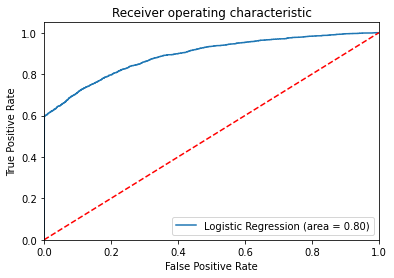

In [138]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


### on représente  la mesure ROC sous la forme d'une courbe qui donne le taux de vrais positifs (fraction des positifs qui sont effectivement détectés) en fonction du taux de faux positifs (fraction des négatifs qui sont incorrectement détectés).

# Pipelines Perform Hyperparameter Tuning Using Grid SearchCV


In [68]:
from sklearn.model_selection import GridSearchCV


In [69]:
# Create a pipeline
pipe = Pipeline([('preprocessor', preprocessor),("classifier", RandomForestClassifier())])
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 }]
# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [71]:
from pandas_profiling import ProfileReport
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator


In [72]:
class SwitchAlgo(BaseEstimator):
    def __init__(self, estimator):
        self.estimator = estimator
        
    def fit(self, X, y=None):
        self.estimator.fit(X, y)
        return self


    def predict(self, X):
        return self.estimator.predict(X)


    def predict_proba(self, X,y):
        DefaultProba = self.estimator.predict_proba(X)
        prediction = self.predict(X)
        DefaultProba = DefaultProba[:,1]
        result = pd.concat ([pd.DataFrame(DefaultProba, index =X.index ,columns = ["Probability"]),
            pd.DataFrame(prediction, index = y.index, columns =["Prediction"])],
           axis=1).head(10)
        return result


    def score(self, X, y):
        return self.estimator.score(X, y)
    
    def confusionMatrix(self, ytest, X):
        y_pred = self.predict(X)
        cm = confusion_matrix(ytest, y_pred)
        labels = ["GOOD","BAD"]
        
        df = pd.DataFrame()
        for i, row_label in enumerate(labels):
            rowdata={}
            for j, col_label in enumerate(labels): 
                rowdata[col_label]=cm[i,j]
            df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
        return df[labels]

    
    def report(self,ytest,X):
        y_pred = self.predict(X)
        report_df = pd.DataFrame(classification_report(y_true = ytest, y_pred =  y_pred, output_dict=True)).transpose()
        return report_df

In [84]:
def Modeling_one(df,algo):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=122)
    print(X_test.shape)

    model = SwitchAlgo(algo)
    fitted = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = model.score(X_test,y_test)
    result = model.predict_proba(X_test, y_test)
    cm = model.confusionMatrix(y_test, X_test)
    report = model.report(y_test, X_test)
    #tune_depth_estimator(X_train,y_train,algo)
    aff = display('Score ='  , score ,'Confusion matrix = ',cm,'Classification Report',report,'Default Probability', result)
    return aff,y_pred, fitted

In [87]:
Modeling_one(data,LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg'))

(8630, 46)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


'Score ='

0.7119351100811124

'Confusion matrix = '

,GOOD,BAD
GOOD,5725,289
BAD,2197,419


'Classification Report'

,precision,recall,f1-score,support
0.0,0.722671,0.951945,0.821613,6014.000000
1.0,0.591808,0.160168,0.252106,2616.000000
accuracy,0.711935,0.711935,0.711935,0.711935
macro avg,0.657239,0.556057,0.536859,8630.000000
weighted avg,0.683003,0.711935,0.648979,8630.000000


'Default Probability'

,Probability,Prediction
4.0,0.397444,NaN
6.0,0.400551,NaN
7.0,0.379035,NaN
11.0,0.065594,NaN
17.0,0.245013,NaN
19.0,0.081208,NaN
36.0,0.198374,NaN
38.0,0.470748,NaN
39.0,0.516129,NaN
41.0,0.269504,NaN


(None,
 array([0., 0., 0., ..., 0., 0., 0.]),
 SwitchAlgo(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                         fit_intercept=True, intercept_scaling=1,
                                         l1_ratio=None, max_iter=100,
                                         multi_class='multinomial', n_jobs=None,
                                         penalty='l2', random_state=0,
                                         solver='newton-cg', tol=0.0001,
                                         verbose=0, warm_start=False)))

[5, 6, 8]
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  6.3min finished


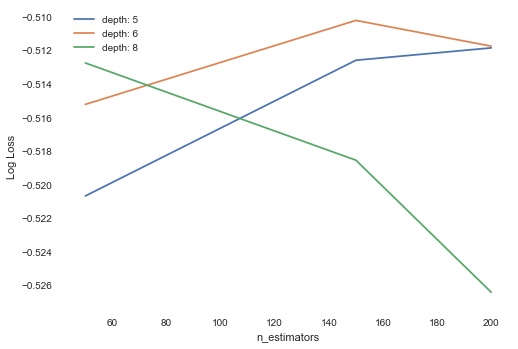

In [109]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

model = GradientBoostingClassifier()

n_estimators = [ 50, 150, 200]
max_depth = [5, 6,8]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train,y_train)


means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']


scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_max_depth.png')

In [112]:
model.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [113]:
y_pred = model.predict(X_test)


In [115]:
def plot_roc(y_test, y_pred,algo):
    fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred) 
    roc_auc1 = auc(fpr1, tpr1)
    plt.figure(figsize=(6,5)) 
    plt.plot(fpr1, tpr1, color='g', lw=2, label= '(area = %0.2f)'% roc_auc1)
    plt.plot([0, 1], [0, 1], color='red', lw=2, label = 'Baseline',linestyle='--') 
    plt.xlim([-0.01, 1.01]) 
    plt.ylim([0.0, 1.05]) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.title('Classifiers ROC curves') 
    plt.legend(loc = "lower right")
    plt.show()

In [117]:
from sklearn.metrics import roc_curve, auc


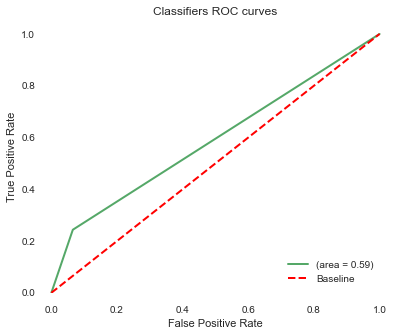

In [118]:
plot_roc(y_test,y_pred,None)